In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\qwerty\\Downloads\\Default_On_Payment.csv")

C:\Users\qwerty\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape
type(df)
df.size
df.head()
df.tail()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
40116,986936.0,A12,24,A34,A49,1935,A61,A75,4.0,A91,...,A121,31.0,A143,A152,2.0,A173,1.0,A192,A201,1.0
40117,986939.0,A12,60,A32,A40,14027,A61,A74,4.0,A93,...,A124,27.0,A143,A152,1.0,A174,1.0,A192,A201,1.0
40118,986944.0,A12,36,A30,A43,3804,A61,A73,4.0,A92,...,A123,42.0,A143,A152,1.0,A173,1.0,A192,A201,1.0
40119,986974.0,A11,20,A34,A40,2235,A61,A73,4.0,A94,...,A122,33.0,A141,A151,2.0,A173,1.0,A191,A202,1.0
40120,987000.0,A14,36,A34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [5]:
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

Customer_ID                     True
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken           True
Credit_Amount                   True
Savings_Acc                     True
Years_At_Present_Employment     True
Inst_Rt_Income                  True
Marital_Status_Gender           True
Other_Debtors_Guarantors        True
Current_Address_Yrs             True
Property                        True
Age                             True
Other_Inst_Plans                True
Housing                         True
Num_CC                          True
Job                             True
Dependents                      True
Telephone                       True
Foreign_Worker                  True
Default_On_Payment              True
dtype: bool

Customer_ID                    1
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          1
Credit_Amount                  1
Savings_Acc                    1
Years_At_Present_Employment    1
Inst_Rt_Income                 1
Marital_Status_Gender          1
Other_Debtors_Guarantors       1
Current_Address_Yrs            1
Property                       2
Age                            2
Other_Inst_Plans               2
Housing                        2
Num_CC                         2
Job                            2
Dependents                     2
Telephone                      2
Foreign_Worker                 2
Default_On_Payment             2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 22 columns):
Customer_ID                    40120 non-null float64
Status_Checking_Acc            40121 non-null object
Duration_in_Months             40121 non-null object
Credit_History                 40121 non-null object
Purposre_Credit_Taken          40120 non-null object
Credit_Amount                  40120 non-null object
Savings_Acc                    40120 non-null object
Years_At_Present_Employment    40120 non-null object
Inst_Rt_Income                 40120 non-null float64
Marital_Status_Gender          40120 non-null object
Other_Debtors_Guarantors       40120 non-null object
Current_Address_Yrs            40120 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

In [6]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)



C:\Users\qwerty\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\qwerty\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\qwerty\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\qwerty\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\qwerty\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\qwerty\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Use

In [7]:
report

Number of variables,22
Number of observations,40121
Total Missing (%),0.0%
Total size in memory,6.7 MiB
Average record size in memory,176.0 B
Numeric,7
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
german=df.dropna(how='any')

In [9]:
german.isnull().sum()

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [10]:
german.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 22 columns):
Customer_ID                    40119 non-null float64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null object
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null object
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null float64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

In [11]:
for col in german.columns:
    if german[col].dtype=='object':
        german[col]=pd.Categorical(german[col]).codes

C:\Users\qwerty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
german

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015.0,3,19,2,0,483,0,2,3.0,1,...,0,21.0,2,0,1.0,2,1.0,0,0,1.0
1,100031.0,0,8,4,4,7,0,3,4.0,1,...,0,58.0,2,1,4.0,1,1.0,1,0,0.0
2,100046.0,1,9,4,4,77,0,1,4.0,2,...,0,23.0,2,1,2.0,2,1.0,0,0,0.0
3,100103.0,3,17,2,0,230,0,2,2.0,2,...,0,31.0,2,1,1.0,2,1.0,1,0,0.0
4,100104.0,0,17,2,0,574,0,1,4.0,1,...,1,27.0,2,1,1.0,2,1.0,0,0,1.0
5,100128.0,0,6,2,4,438,0,4,3.0,2,...,0,52.0,2,1,1.0,1,1.0,0,0,0.0
6,100148.0,0,7,4,0,671,0,2,1.0,2,...,0,40.0,2,1,2.0,1,2.0,0,0,0.0
7,100164.0,3,17,4,4,418,1,4,4.0,2,...,1,52.0,0,1,2.0,2,1.0,0,0,0.0
8,100182.0,1,13,2,4,75,0,2,4.0,3,...,0,25.0,2,1,1.0,1,1.0,0,0,0.0
9,100230.0,3,8,2,0,227,2,2,2.0,1,...,1,26.0,2,1,1.0,2,1.0,0,0,1.0


In [13]:
report = pandas_profiling.ProfileReport(german)
report

Number of variables,23
Number of observations,40119
Total Missing (%),0.0%
Total size in memory,3.1 MiB
Average record size in memory,80.0 B
Numeric,18
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,1


In [14]:
x1=german.drop('Customer_ID', axis =1)
x=x1.drop('Default_On_Payment', axis =1)
y=german['Default_On_Payment']
x.head()
y.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
0,3,19,2,0,483,0,2,3.0,1,0,3.0,0,21.0,2,0,1.0,2,1.0,0,0
1,0,8,4,4,7,0,3,4.0,1,0,3.0,0,58.0,2,1,4.0,1,1.0,1,0
2,1,9,4,4,77,0,1,4.0,2,2,4.0,0,23.0,2,1,2.0,2,1.0,0,0
3,3,17,2,0,230,0,2,2.0,2,2,2.0,0,31.0,2,1,1.0,2,1.0,1,0
4,0,17,2,0,574,0,1,4.0,1,0,1.0,1,27.0,2,1,1.0,2,1.0,0,0


0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Default_On_Payment, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(28083, 20)

(12036, 20)

(28083,)

(12036,)

In [16]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [17]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
log.coef_

array([[-5.93776675e-01,  2.23139988e-02, -4.13076900e-01,
        -2.22894612e-02, -4.39682451e-04, -2.02708599e-01,
        -1.57395186e-01,  1.94318932e-01, -2.26086192e-01,
        -2.85570766e-01,  1.73259884e-03,  3.05413745e-01,
        -8.80662506e-03, -2.92710733e-01, -2.41378829e-01,
         2.97766299e-01,  7.42035978e-02,  1.22512269e-01,
        -1.64984558e-01, -1.25364139e+00]])

In [19]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values("Variable",ascending = True)

,Variable,Coeff
12,Age,-0.008807
4,Credit_Amount,-0.000440
2,Credit_History,-0.413077
10,Current_Address_Yrs,0.001733
17,Dependents,0.122512
1,Duration_in_Months,0.022314
19,Foreign_Worker,-1.253641
14,Housing,-0.241379
7,Inst_Rt_Income,0.194319
16,Job,0.074204


In [20]:
#Generate Model Diagnostics
classes = log.predict(test_x)
print (classes.size)
print ('Positive Cases in Test Data:', test_y[test_y ==1].shape[0])
print ('Negative Cases in Test Data:', test_y[test_y ==0].shape[0])

12036
Positive Cases in Test Data: 3592
Negative Cases in Test Data: 8444


In [21]:
#Precision and Recall
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))
print ('AUC')
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.768361581920904
Precision/Recall Metrics
             precision    recall  f1-score   support

        0.0       0.80      0.90      0.84      8444
        1.0       0.66      0.47      0.55      3592

avg / total       0.76      0.77      0.76     12036

AUC


0.6815819326911005

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

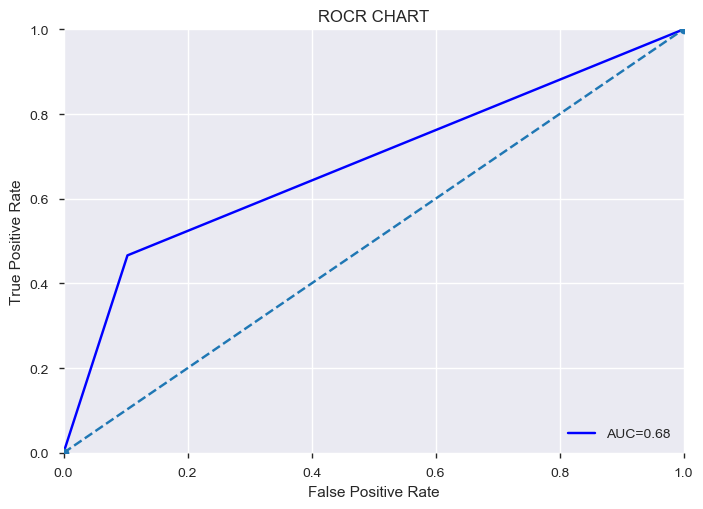

In [22]:
#ROC Chart
fpr, tpr, th=roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


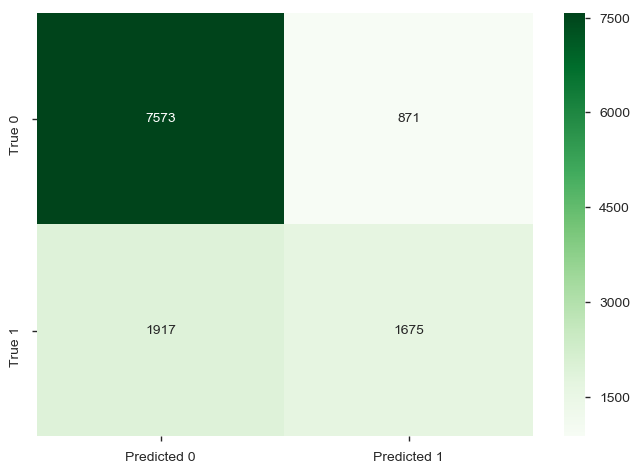

In [23]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(test_y,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

In [25]:
dt=DecisionTreeClassifier(criterion = "gini",max_depth=2)
mod=dt.fit(train_x,train_y)
classesdt =dt.predict(test_x)
aucdt=metrics.roc_auc_score(test_y,classesdt)
aucdt

0.5

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

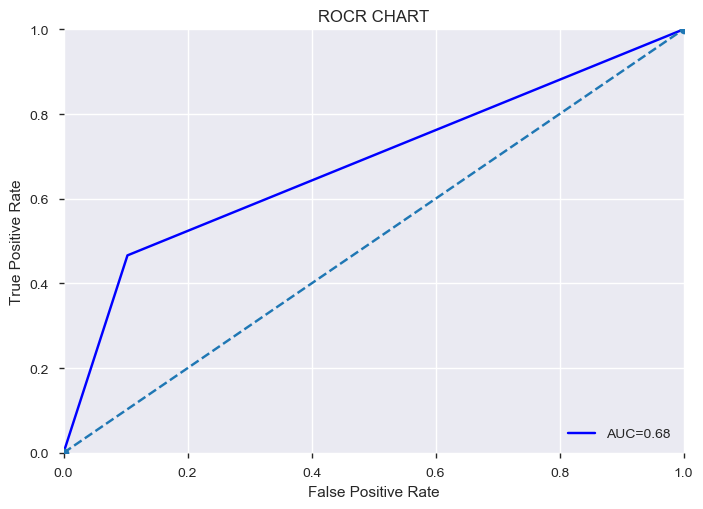

In [26]:
#ROC Chart
fpr, tpr, th=roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
from sklearn import tree
import graphviz
with open("treepic.txt","w") as dot_data:
    dot_data = tree.export_graphviz(mod, out_file=None, feature_names=train_x.columns, class_names=['Default','Not'],filled=True,rounded=True,special_characters=True)

In [28]:
graph = graphviz.Source(dot_data)

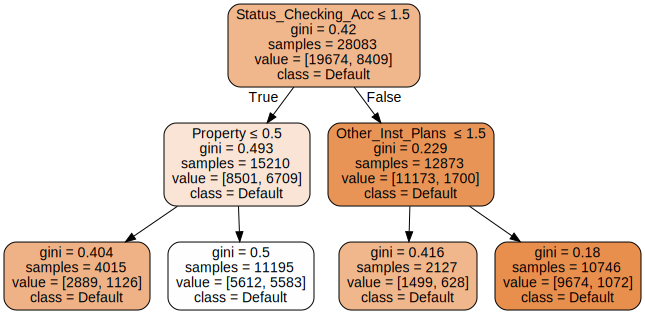

In [29]:
graph

In [32]:
test_y.shape

(12036,)

In [34]:
import seaborn as sns
from sklearn import tree
from sklearn import svm

In [35]:
test_y.shape

(12036,)

In [36]:
svm_clf = svm.SVC()

In [37]:
svm_clf.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_pred_test = svm_clf.predict(test_x)

In [39]:
y_pred_test

array([1., 0., 0., ..., 0., 0., 0.])

In [40]:
metrics.accuracy_score(test_y, y_pred_test)


0.9996676636756398

In [41]:
conf= metrics.confusion_matrix(test_y, y_pred_test)

In [42]:
conf

array([[8444,    0],
       [   4, 3588]], dtype=int64)

In [43]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

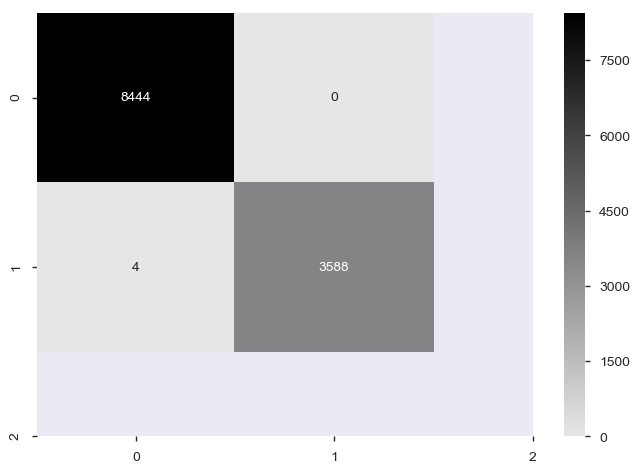

In [44]:
sns.heatmap(conf,cmap= cmap,xticklabels=['0','1','2'],yticklabels=['0','1','2'],annot=True, fmt="d")

In [45]:
pr_rcl = metrics.precision_recall_fscore_support(test_y, y_pred_test,average='weighted')

In [46]:
pr_rcl

(0.9996678210318539, 0.9996676636756398, 0.9996676104512163, None)

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()

In [52]:
param_grid = [{'C': [0.01,1,10,100,1000], 'kernel': ['linear','poly','rbf','sigmoid'], 'gamma': [0.01,1,10,100,1000]}]

In [53]:
model = GridSearchCV(svc,param_grid,cv=10, scoring='accuracy')

In [ ]:
model.fit(x,y)

In [ ]:
model.best_params_

In [ ]:
model.best_score_